# <center><u><font color='red'> Prédiction des émissions  de CO2</font></u></center>

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge,Lasso,ElasticNet,LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from functions import utils
import math
from sklearn.svm import SVR
from xgboost import XGBRegressor 
from functions.functions import *
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
pd.options.display.float_format = '{:,.4f}'.format


In [178]:
target_col='TotalGHGEmissions'

In [179]:
df=pd.read_csv('data/cleaned_and_normalized.csv')


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 52 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NumberofBuildings                                965 non-null    float64
 1   NumberofFloors                                   965 non-null    float64
 2   PropertyGFABuilding(s)                           965 non-null    float64
 3   TotalGHGEmissions                                965 non-null    float64
 4   SiteEnergyUse(kBtu)                              965 non-null    float64
 5   ENERGYSTARScore                                  965 non-null    float64
 6   age                                              965 non-null    float64
 7   distance_from_center_ville                       965 non-null    float64
 8   natural_gas_percentage                           965 non-null    float64
 9   BuildingType_Campus             

In [181]:
df.isnull().sum()/len(df)*100

NumberofBuildings                                 0.0000
NumberofFloors                                    0.0000
PropertyGFABuilding(s)                            0.0000
TotalGHGEmissions                                 0.0000
SiteEnergyUse(kBtu)                               0.0000
ENERGYSTARScore                                   0.0000
age                                               0.0000
distance_from_center_ville                        0.0000
natural_gas_percentage                            0.0000
BuildingType_Campus                               0.0000
BuildingType_NonResidential                       0.0000
BuildingType_Nonresidential COS                   0.0000
BuildingType_Nonresidential WA                    0.0000
BuildingType_SPS-District K-12                    0.0000
PrimaryPropertyType_Distribution Center           0.0000
PrimaryPropertyType_Hospital                      0.0000
PrimaryPropertyType_Hotel                         0.0000
PrimaryPropertyType_K-12 School

In [182]:
cols=['best_params','R2','rmse','model','time_elapsed']
df_result=pd.DataFrame(columns=cols)
df_result_with_energy_star_score=pd.DataFrame(columns=cols)

In [183]:
test_size=0.25
random_state=42
cv=5
scoring='r2'
feature_cols=[col for col in df.columns.tolist() if col not in ['TotalGHGEmissions','SiteEnergyUse(kBtu)','ENERGYSTARScore']]

 
feature_cols_with_energy_star_score=[col for col in df.columns.tolist() if col not in ['TotalGHGEmissions','SiteEnergyUse(kBtu)','ENERGYSTARScore']]

 

In [184]:
X_train,X_test,y_train,y_test=train_test_split(df[feature_cols],df[target_col],test_size=test_size,random_state=random_state)
X_train_with_energy_star_score=X_train[feature_cols_with_energy_star_score]
X_test_with_energy_star_score=X_test[feature_cols_with_energy_star_score]
train_y=y_train.values
test_y=y_test.values


## Partie 1 modèles linéaires

### 1 <u>Modèle linéaire simple</u>

#### 1-1 <u>Régression linéaire sans ENERGYSTARScore </u>

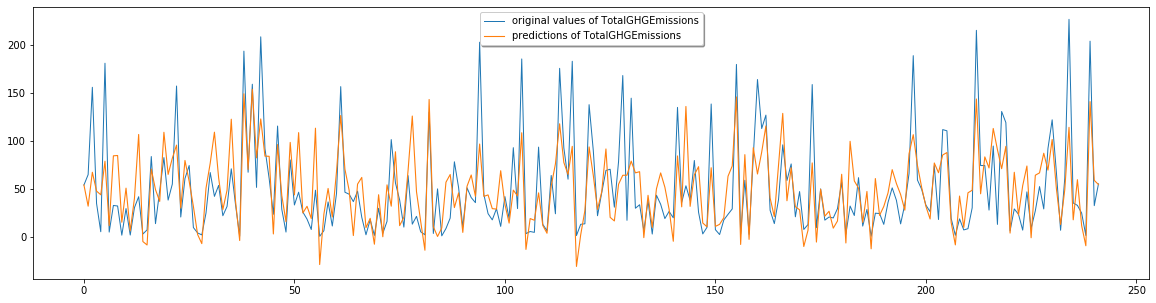

,best_params,R2,rmse,model,time_elapsed
0,None,0.5170,34.8466,LinearRegression,0.0031


In [185]:

train_x=X_train.values
test_x=X_test.values
 

result=utils.model_func(df,LinearRegression(),target_col,feature_cols,test_size,random_state,train_x,test_x,train_y,test_y)

df_result=df_result.append(result,ignore_index = True)
df_result

R2 assez élevé de 94%, l'émission de gaz naturel a un effet très significatif sur l'émission de co2

#### 1-2  <u>Régression linéaire avec ENERGYSTARScore </u>

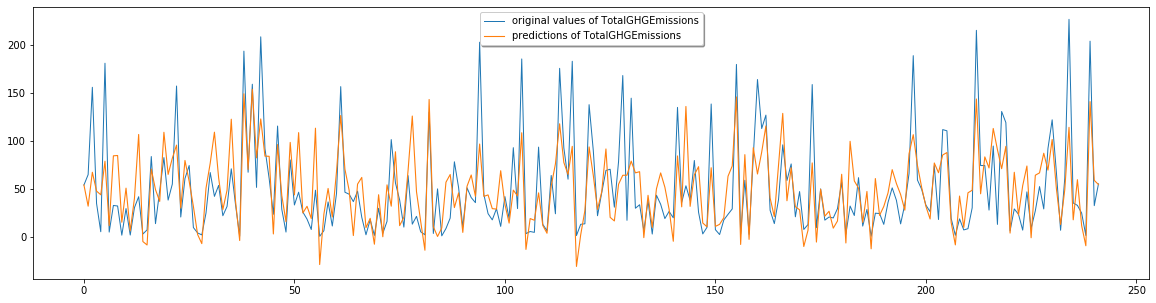

{'best_params': None, 'R2': 0.517020101760096, 'rmse': 34.84660127160839, 'model': 'LinearRegression', 'time_elapsed': 0.0038959409575909376}


In [186]:

train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values
 
result=utils.model_func(df,LinearRegression(),target_col,feature_cols_with_energy_star_score,test_size,random_state,train_x,test_x,train_y,test_y)

df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
df_result_with_energy_star_score
print(result)

avec un R2 de 93% 

### 2 <u>Régression de ridge</u>

#### 2-1 <u>Régression de ridge sans ENERGYSTARScore </u>

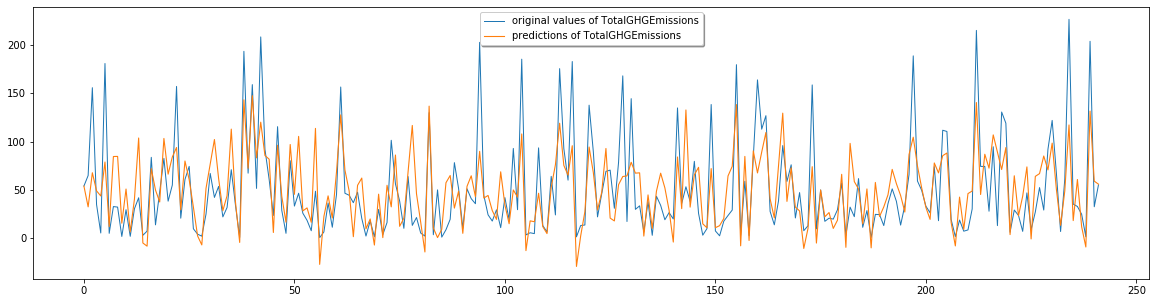

{'best_params': {'alpha': 1.0, 'fit_intercept': False, 'solver': 'saga'}, 'R2': 0.5109481819318642, 'rmse': 34.65862411165442, 'model': 'Ridge', 'time_elapsed': 8.54127662605606}


In [189]:

train_x=X_train_with_energy_star_score.values
test_x=X_test.values
 
param_grid = [{
    'alpha':[1],
    'fit_intercept':[True,False],
  
  'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}]



scoring = 'r2'
 
model = Ridge(random_state=random_state)
#ridge.best_params_,ridge.best_score_,rmse,model.__class__.__name__,elapsed
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)

df_result=df_result.append(result,ignore_index = True)
print(result)

#### 2-2 <u>Régression de ridge avec ENERGYSTARScore </u>

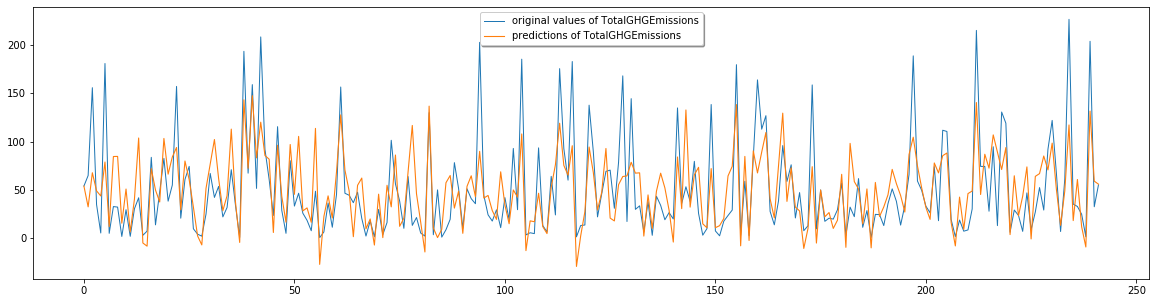

{'best_params': {'alpha': 1, 'fit_intercept': False, 'solver': 'saga'}, 'R2': 0.5109481819318642, 'rmse': 34.65862411165442, 'model': 'Ridge', 'time_elapsed': 0.8686112690484151}


,best_params,R2,rmse,model,time_elapsed
0,None,0.5170,34.8466,LinearRegression,0.0039
1,"{'alpha': 1, 'fit_intercept': False, 'solver':...",0.5109,34.6586,Ridge,0.8686


In [190]:
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values

 
param_grid = [{
    'alpha':[1],
    'fit_intercept':[True,False],
  
  'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}]

 
model = Ridge(random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
print(result)
df_result_with_energy_star_score

### 3 <u>Régression de Lasso</u>

#### 3-1 <u>Régression de Lasso sans ENERGYSTARScore </u>

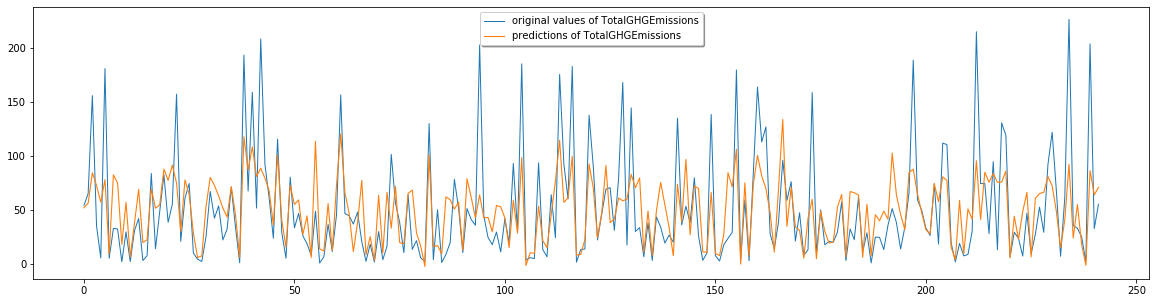

{'best_params': {'alpha': 1, 'fit_intercept': True}, 'R2': 0.44764486428788236, 'rmse': 36.395825867113835, 'model': 'Lasso', 'time_elapsed': 0.2265391630353406}


,best_params,R2,rmse,model,time_elapsed
0,None,0.5170,34.8466,LinearRegression,0.0031
1,"{'alpha': 1, 'fit_intercept': False, 'solver':...",0.5109,34.6586,Ridge,5.5704
2,"{'alpha': 1.0, 'fit_intercept': False, 'solver...",0.5109,34.6586,Ridge,87.4051
3,"{'alpha': 1.0, 'fit_intercept': False, 'solver...",0.5109,34.6586,Ridge,8.5413
4,"{'alpha': 1, 'fit_intercept': True}",0.4476,36.3958,Lasso,0.2265


In [191]:
train_x=X_train.values
test_x=X_test.values

 
param_grid = [{
    'alpha':[1],
    'fit_intercept':[True,False],
  
  
}]


scoring = 'r2'
 
model = Lasso( random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)

df_result=df_result.append(result,ignore_index = True)
print(result)
df_result

#### 3-2 <u>Régression de Lasso avec ENERGYSTARScore </u>

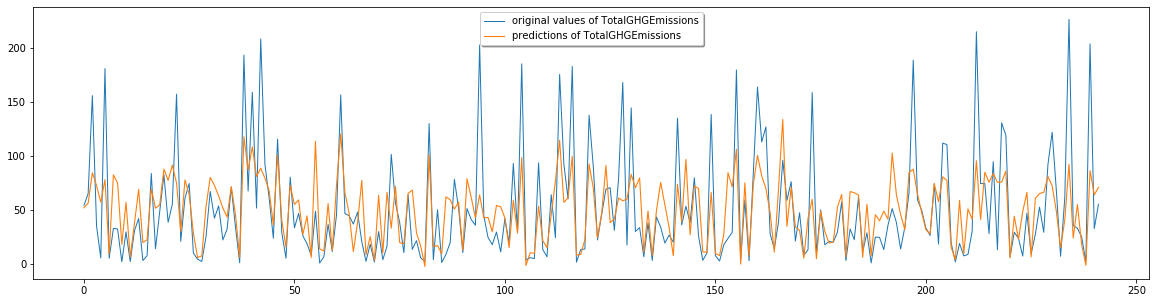

{'best_params': {'alpha': 1, 'fit_intercept': True}, 'R2': 0.44764486428788236, 'rmse': 36.395825867113835, 'model': 'Lasso', 'time_elapsed': 0.03423112991731614}


,best_params,R2,rmse,model,time_elapsed
0,None,0.5170,34.8466,LinearRegression,0.0039
1,"{'alpha': 1, 'fit_intercept': False, 'solver':...",0.5109,34.6586,Ridge,0.8686
2,"{'alpha': 1, 'fit_intercept': True}",0.4476,36.3958,Lasso,0.0342


In [192]:
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values

 
param_grid = [{
    'alpha':[1],
    'fit_intercept':[True,False],
  
  
}]


scoring = 'r2'
 
model = Lasso( random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
print(result)
df_result_with_energy_star_score

### 4 <u>Régression de ElasticNet</u>

#### 4-1 <u>Régression de ElasticNet sans ENERGYSTARScore </u>

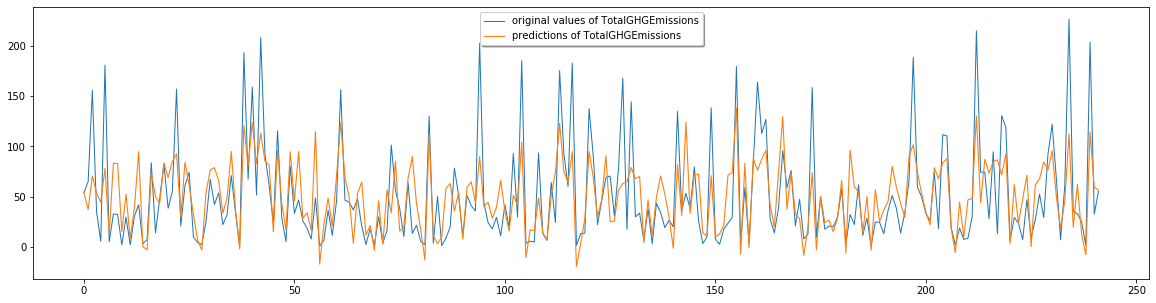

,best_params,R2,rmse,model,time_elapsed
0,None,0.5170,34.8466,LinearRegression,0.0030
1,"{'alpha': 3, 'fit_intercept': True, 'solver': ...",0.5101,34.4592,Ridge,1.8261
2,"{'alpha': 0.17500000000000002, 'fit_intercept'...",0.5117,34.6460,Lasso,0.2551
3,"{'alpha': 0.01, 'l1_ratio': 0.009000000000000001}",0.5047,34.4499,ElasticNet,10.4976


In [163]:
train_x=X_train.values
test_x=X_test.values
 #param_grid = [{'alpha' : np.arange(0,0.2,0.001)}]
param_grid = [{"alpha": np.arange(0,0.5,0.01),  #coefficient qui multiplie le terme de pénalité
              "l1_ratio": np.arange(0, 0.01, 0.001)}]#L1 ratio si = 1 équivaut à un Lasso si 0 à un Ridge


 
model = ElasticNet( random_state=random_state,normalize=False)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result=df_result.append(result,ignore_index = True)
df_result

#### 4-2 <u>Régression de ElasticNet avec ENERGYSTARScore </u>

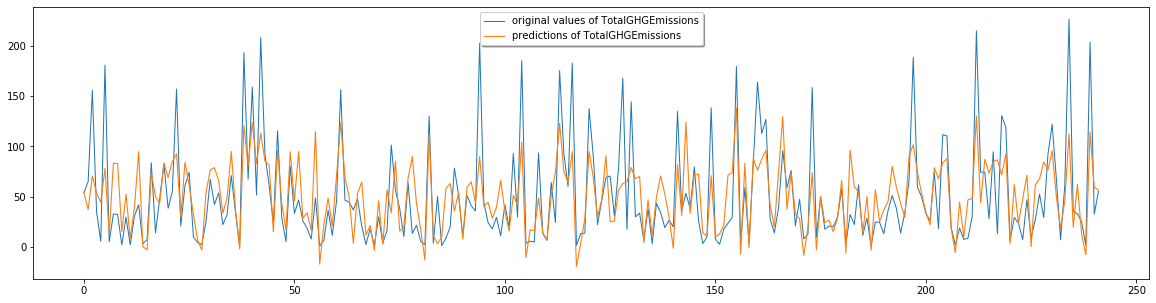

{'best_params': {'alpha': 0.01, 'l1_ratio': 0.009000000000000001}, 'R2': 0.5047337730144033, 'rmse': 34.44991935674286, 'model': 'ElasticNet', 'time_elapsed': 10.578374141943641}


,best_params,R2,rmse,model,time_elapsed
0,None,0.5170,34.8466,LinearRegression,0.0029
1,"{'alpha': 3, 'fit_intercept': True, 'solver': ...",0.5101,34.4592,Ridge,1.8510
2,"{'alpha': 0.17500000000000002, 'fit_intercept'...",0.5117,34.6460,Lasso,0.2478
3,"{'alpha': 0.01, 'l1_ratio': 0.009000000000000001}",0.5047,34.4499,ElasticNet,10.5784


In [164]:
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values

param_grid = [{"alpha": np.arange(0,0.5,0.01),  #coefficient qui multiplie le terme de pénalité
              "l1_ratio": np.arange(0, 0.01, 0.001)}]#L1 ratio si = 1 équivaut à un Lasso si 0 à un Ridge

 
model = ElasticNet( random_state=random_state,normalize=False)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
print(result)
df_result_with_energy_star_score

Conclusion modèles linéaires: La régularisation Ridge avec le pramaètre alpha=1 reste le meilleur modèle, la prise en compte de ENERGYSTARScore comme variable explicative améliore les performance du modèle

## Partie 2 modèles non linéaires

### 1 <u>Random Forest</u>

#### 1-1 <u>Random Forest sans ENERGYSTARScore </u>

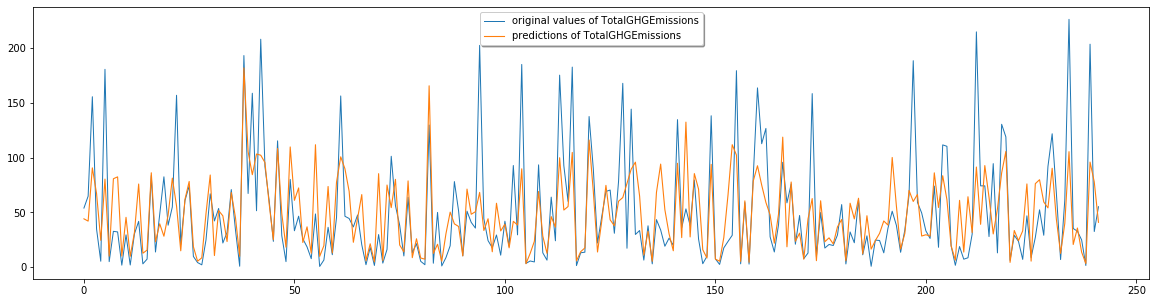

,best_params,R2,rmse,model,time_elapsed
0,None,0.5170,34.8466,LinearRegression,0.0031
1,"{'alpha': 1, 'fit_intercept': False, 'solver':...",0.5109,34.6586,Ridge,5.5704
2,"{'alpha': 1.0, 'fit_intercept': False, 'solver...",0.5109,34.6586,Ridge,87.4051
3,"{'alpha': 1.0, 'fit_intercept': False, 'solver...",0.5109,34.6586,Ridge,8.5413
4,"{'alpha': 1, 'fit_intercept': True}",0.4476,36.3958,Lasso,0.2265
5,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.4932,36.3594,RandomForestRegressor,931.8759


In [193]:

train_x=X_train.values
test_x=X_test.values
 


 '''
param_grid = {
'n_estimators':[5,20,50,100], # nombre d'arbres
'max_features':['auto', 'sqrt'], # nombre de variables tenu en compte pour la création de chaque arbre
'max_depth':np.arange(10,130,10), # nombre maximum de niveaux dans chaque arbre de décision 
'min_samples_split':[2, 6, 10], # nombre minimal d'observation avant séparation du noeud
'min_samples_leaf':[1, 3, 4], #nombre minimal d'observation pour créer une feuille
'bootstrap':[True, False] # méthode d'échantillonnage
}   
'''
 
## best params
param_grid={'bootstrap': [True],
 'max_depth': [10],
 'max_features': ['auto'],
 'min_samples_leaf': [3],
 'min_samples_split': [2],
 'n_estimators': [100]
           }

model = RandomForestRegressor(random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result=df_result.append(result,ignore_index = True)
df_result


In [194]:
df_result['best_params'][5]

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

#### 1-2 <u>Random Forest avec ENERGYSTARScore </u>

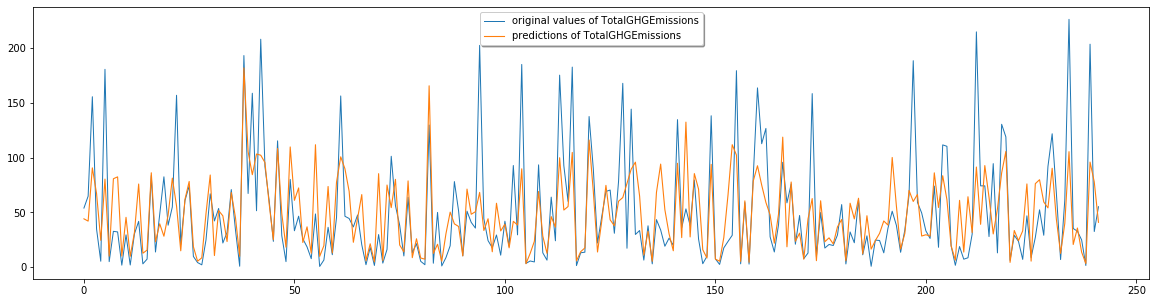

,best_params,R2,rmse,model,time_elapsed
0,None,0.5170,34.8466,LinearRegression,0.0039
1,"{'alpha': 1, 'fit_intercept': False, 'solver':...",0.5109,34.6586,Ridge,0.8686
2,"{'alpha': 1, 'fit_intercept': True}",0.4476,36.3958,Lasso,0.0342
3,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.4932,36.3594,RandomForestRegressor,1.6344


In [195]:
 
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values
 

 


'''
param_grid = {
'n_estimators':[5,20,50,100], # nombre d'arbres
'max_features':['auto', 'sqrt'], # nombre de variables tenu en compte pour la création de chaque arbre
'max_depth':np.arange(10,130,10), # nombre maximum de niveaux dans chaque arbre de décision 
'min_samples_split':[2, 6, 10], # nombre minimal d'observation avant séparation du noeud
'min_samples_leaf':[1, 3, 4], #nombre minimal d'observation pour créer une feuille
'bootstrap':[True, False] # méthode d'échantillonnage
}   
'''
 
## best params
param_grid={'bootstrap': [True],
 'max_depth': [10],
 'max_features': ['auto'],
 'min_samples_leaf': [3],
 'min_samples_split': [2],
 'n_estimators': [100]
           }
 
model = RandomForestRegressor(random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
df_result_with_energy_star_score
 

In [168]:
df_result_with_energy_star_score.sort_values(by='R2',ascending=False)

,best_params,R2,rmse,model,time_elapsed
0,None,0.5170,34.8466,LinearRegression,0.0029
2,"{'alpha': 0.17500000000000002, 'fit_intercept'...",0.5117,34.6460,Lasso,0.2478
1,"{'alpha': 3, 'fit_intercept': True, 'solver': ...",0.5101,34.4592,Ridge,1.8510
3,"{'alpha': 0.01, 'l1_ratio': 0.009000000000000001}",0.5047,34.4499,ElasticNet,10.5784
4,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.4745,35.8259,RandomForestRegressor,0.9175


In [169]:


df_result.sort_values(by='R2',ascending=False)

,best_params,R2,rmse,model,time_elapsed
0,None,0.5170,34.8466,LinearRegression,0.0030
2,"{'alpha': 0.17500000000000002, 'fit_intercept'...",0.5117,34.6460,Lasso,0.2551
1,"{'alpha': 3, 'fit_intercept': True, 'solver': ...",0.5101,34.4592,Ridge,1.8261
3,"{'alpha': 0.01, 'l1_ratio': 0.009000000000000001}",0.5047,34.4499,ElasticNet,10.4976
4,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.4745,35.8259,RandomForestRegressor,0.9376


  ### 2 <u>XGBoost</u>

#### 2-1 <u>XGBoost sans ENERGYSTARScore </u>

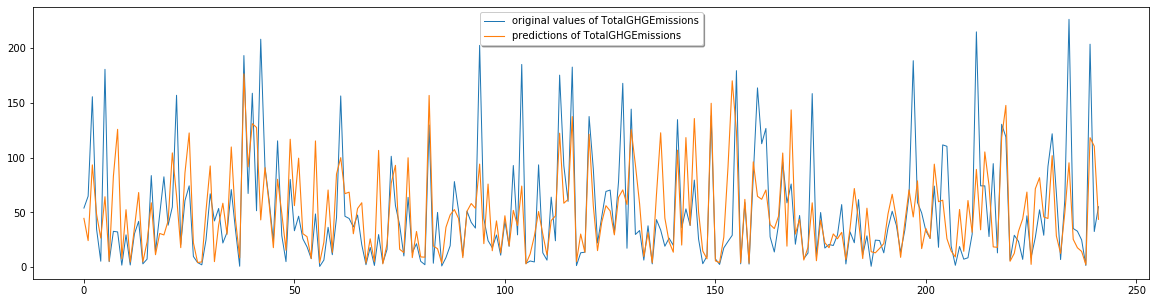

,best_params,R2,rmse,model,time_elapsed
0,None,0.5170,34.8466,LinearRegression,0.0031
1,"{'alpha': 1, 'fit_intercept': False, 'solver':...",0.5109,34.6586,Ridge,5.5704
2,"{'alpha': 1.0, 'fit_intercept': False, 'solver...",0.5109,34.6586,Ridge,87.4051
3,"{'alpha': 1.0, 'fit_intercept': False, 'solver...",0.5109,34.6586,Ridge,8.5413
4,"{'alpha': 1, 'fit_intercept': True}",0.4476,36.3958,Lasso,0.2265
5,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.4932,36.3594,RandomForestRegressor,931.8759
6,"{'learning_rate': 0.1, 'max_depth': 25, 'n_est...",0.4225,39.2841,XGBRegressor,679.6617
7,"{'learning_rate': 0.1, 'max_depth': 25, 'n_est...",0.4225,39.2841,XGBRegressor,2.1948


In [200]:
 
train_x=X_train.values
test_x=X_test.values
 
'''
param_grid = {
    'learning_rate':np.arange(0.1,1,0.1),
    'n_estimators':  np.arange(50, 110, 10),  #nombre d'arbres de décision 50
              'max_depth': np.arange(20, 50, 5)} #nombre maximum de niveaux dans chaque arbre de décision 20
# define the model/ estimator
'''

param_grid={'learning_rate': [0.1], 'max_depth': [25], 'n_estimators': [50]}

model = XGBRegressor(random_state=42)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result=df_result.append(result,ignore_index = True)
df_result

In [198]:
df_result['best_params'][6]

{'learning_rate': 0.1, 'max_depth': 25, 'n_estimators': 50}

#### 2-2 <u>XGBoost avec ENERGYSTARScore </u>

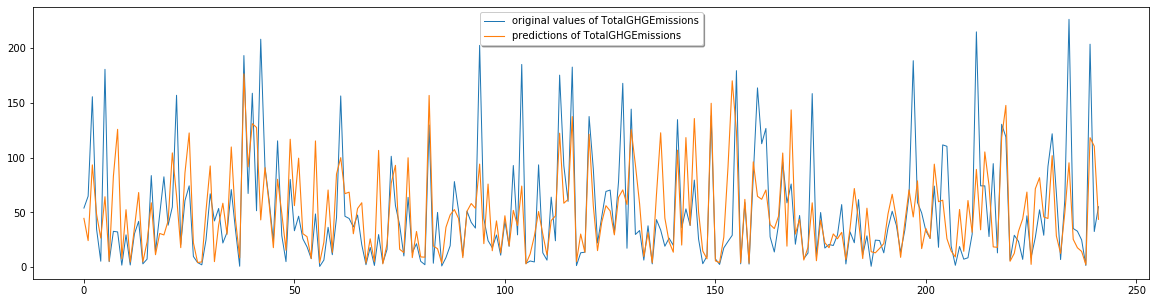

,best_params,R2,rmse,model,time_elapsed
0,None,0.5170,34.8466,LinearRegression,0.0039
1,"{'alpha': 1, 'fit_intercept': False, 'solver':...",0.5109,34.6586,Ridge,0.8686
2,"{'alpha': 1, 'fit_intercept': True}",0.4476,36.3958,Lasso,0.0342
3,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.4932,36.3594,RandomForestRegressor,1.6344
4,"{'learning_rate': 0.1, 'max_depth': 25, 'n_est...",0.4225,39.2841,XGBRegressor,2.3092


In [202]:
 
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values

'''
param_grid = {
    'learning_rate':np.arange(0.1,1,0.1),
    'n_estimators':  np.arange(50, 110, 10),  #nombre d'arbres de décision 50
              'max_depth': np.arange(20, 50, 5)} #nombre maximum de niveaux dans chaque arbre de décision 20
# define the model/ estimator
'''

param_grid={'learning_rate': [0.1], 'max_depth': [25], 'n_estimators': [50]}


# define the model/ estimator
model = XGBRegressor(random_state=42)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
df_result_with_energy_star_score


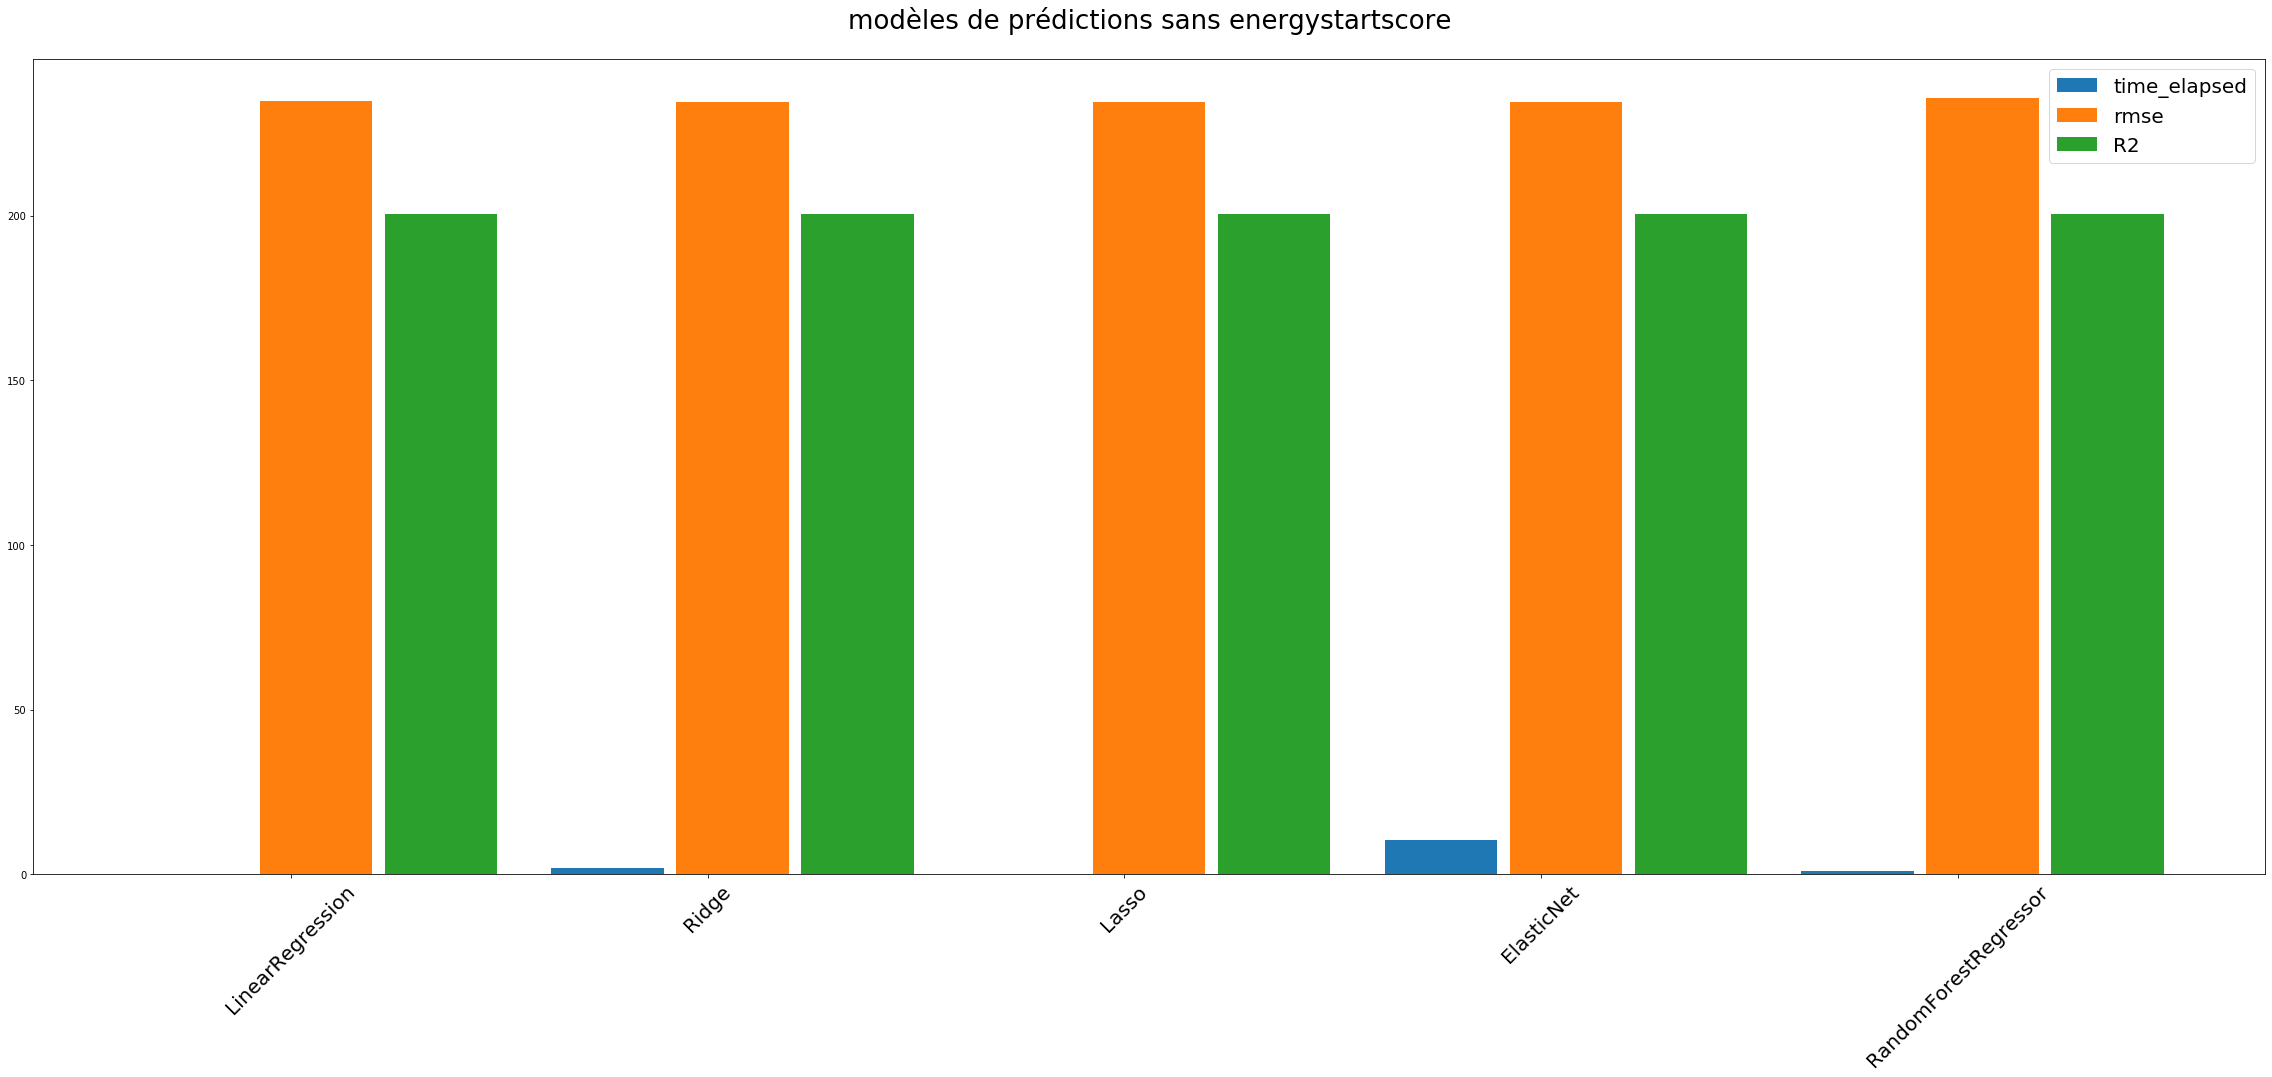

In [172]:
from sklearn.preprocessing import StandardScaler
Labels=df_result['model'].unique().tolist()
 
 
numeric_cols=['R2','rmse','time_elapsed']
fig, ax = plt.subplots(figsize=(40,15))
data_plot=df_result.copy()
data_plot['R2']=data_plot['R2']+200
data_plot['rmse']=data_plot['rmse']+200
 
utils.bar_plot(ax,data_plot[['time_elapsed','rmse','R2']], total_width=1.5, single_width=0.9)
plt.xticks(range(len(Labels)), Labels, fontsize=20, rotation=45)

ttl = plt.title("modèles de prédictions sans energystartscore", fontsize=26)
ttl.set_position([.5, 1.03])
plt.show()

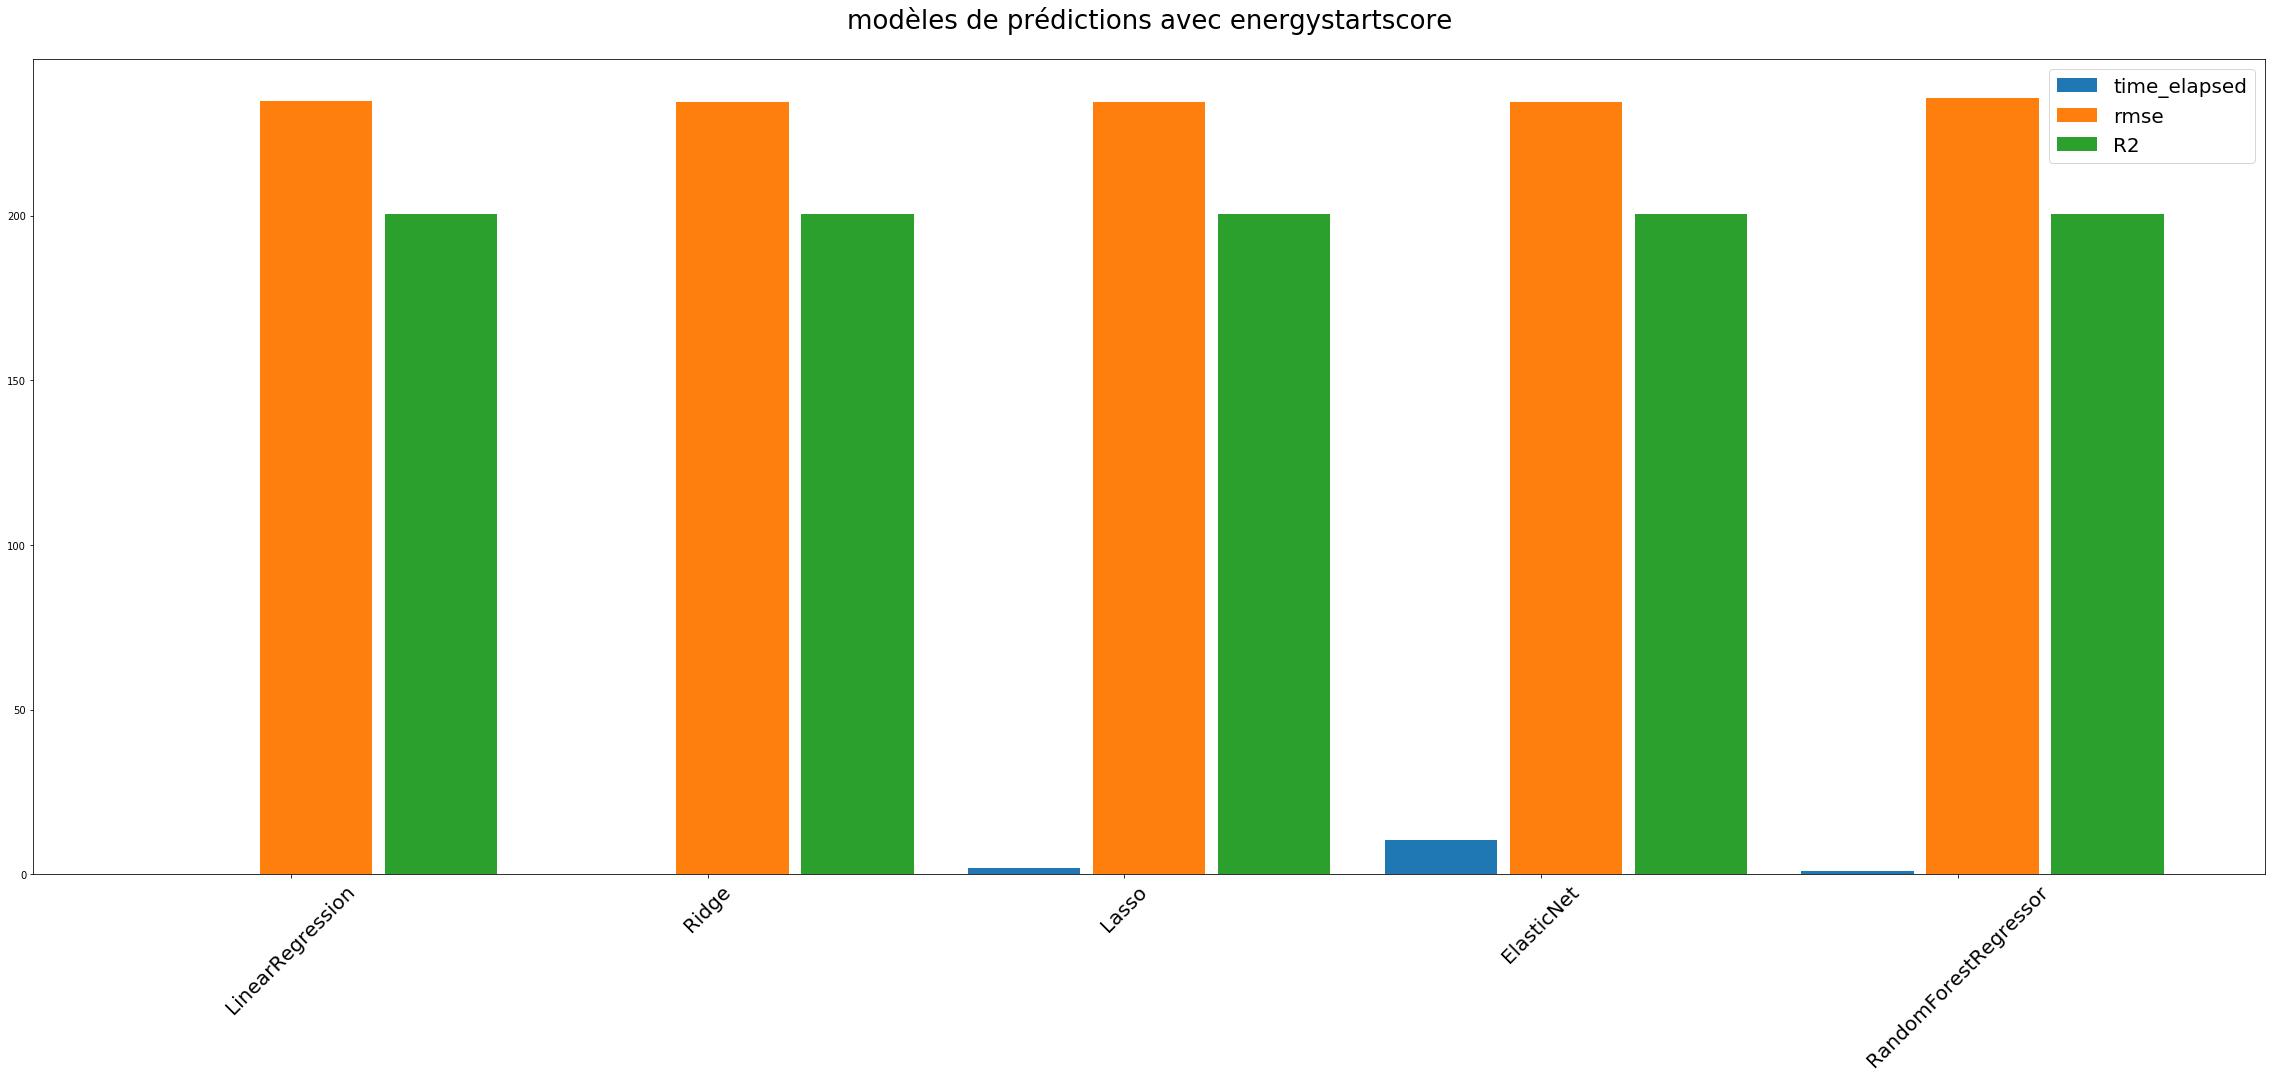

In [173]:
from sklearn.preprocessing import StandardScaler
Labels=df_result_with_energy_star_score['model'].unique().tolist()
 
 
numeric_cols=['R2','rmse','time_elapsed']
fig, ax = plt.subplots(figsize=(40,15))
data_plot=df_result_with_energy_star_score.copy()
data_plot['R2']=data_plot['R2']+200
data_plot['rmse']=data_plot['rmse']+200
 
utils.bar_plot(ax,data_plot[['time_elapsed','rmse','R2']].sort_values(ascending=False,by='R2'), total_width=1.5, single_width=0.9)
plt.xticks(range(len(Labels)), Labels, fontsize=20, rotation=45)

ttl = plt.title("modèles de prédictions avec energystartscore", fontsize=26)
ttl.set_position([.5, 1.03])
plt.show()

In [174]:
df_result

,best_params,R2,rmse,model,time_elapsed
0,None,0.5170,34.8466,LinearRegression,0.0030
1,"{'alpha': 3, 'fit_intercept': True, 'solver': ...",0.5101,34.4592,Ridge,1.8261
2,"{'alpha': 0.17500000000000002, 'fit_intercept'...",0.5117,34.6460,Lasso,0.2551
3,"{'alpha': 0.01, 'l1_ratio': 0.009000000000000001}",0.5047,34.4499,ElasticNet,10.4976
4,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.4745,35.8259,RandomForestRegressor,0.9376


In [175]:
df_result_with_energy_star_score.sort_values(by='R2',ascending=False)

,best_params,R2,rmse,model,time_elapsed
0,None,0.5170,34.8466,LinearRegression,0.0029
2,"{'alpha': 0.17500000000000002, 'fit_intercept'...",0.5117,34.6460,Lasso,0.2478
1,"{'alpha': 3, 'fit_intercept': True, 'solver': ...",0.5101,34.4592,Ridge,1.8510
3,"{'alpha': 0.01, 'l1_ratio': 0.009000000000000001}",0.5047,34.4499,ElasticNet,10.5784
4,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.4745,35.8259,RandomForestRegressor,0.9175


In [176]:
'''


# Fixer les valeurs des hyperparamètres à tester
param_grid = { 'hidden_layer_sizes': [i for i in range(1,15)],
              'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'solver': ['sgd', 'adam'],    #choose stochastic gradient descent function
              'alpha': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}#terme de régulation





train_x=X_train.values
test_x=X_test.values
 
model = MLPRegressor()
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result=df_result.append(result,ignore_index = True)
df_result
'''

"\n\n\n# Fixer les valeurs des hyperparamètres à tester\nparam_grid = { 'hidden_layer_sizes': [i for i in range(1,15)],\n              'activation': ['identity', 'logistic', 'tanh', 'relu'],\n              'solver': ['sgd', 'adam'],    #choose stochastic gradient descent function\n              'alpha': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}#terme de régulation\n\n\n\n\n\ntrain_x=X_train.values\ntest_x=X_test.values\n \nmodel = MLPRegressor()\nresult=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)\n\n\ndf_result=df_result.append(result,ignore_index = True)\ndf_result\n"